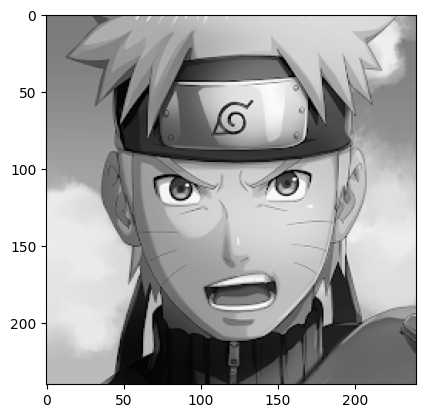

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct

img = cv2.imread('imgs/naruto.webp', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

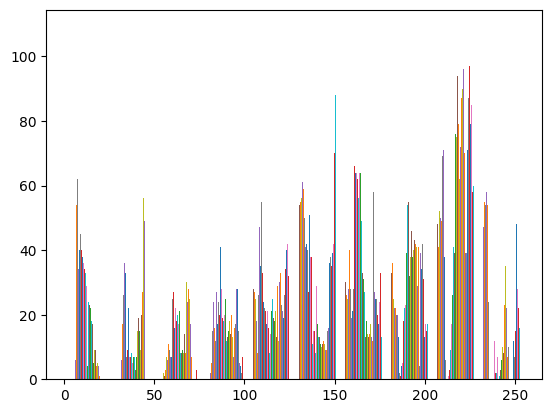

In [45]:
plt.hist(img)
plt.show()

(array([[  0.,   2., 208., ...,   3.,   6.,  10.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   1., 239., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.]]),
 array([-554.44388234, -299.88699411,  -45.33010588,  209.22678236,
         463.78367059,  718.34055883,  972.89744706, 1227.4543353 ,
        1482.01122353, 1736.56811177, 1991.125     ]),
 <a list of 240 BarContainer objects>)

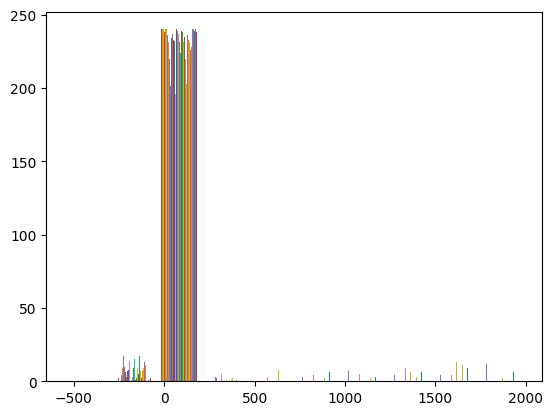

In [46]:
Y = np.zeros(img.shape)

U = img.shape[0]//8
V = img.shape[1]//8
for u in range(U):
    for v in range(V):
        img_blck = img[u*8: u*8 + 8, v*8: v*8 + 8]
        Y[u*8: u*8 + 8, v*8: v*8 + 8] = dct(dct(img_blck, axis=0, norm='ortho'), axis=1, norm='ortho')


# plt.imshow(Y, cmap='gray')
plt.hist(Y)

In [47]:
quantization = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
])


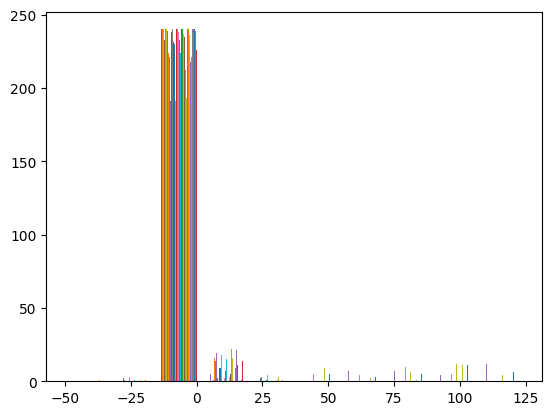

In [48]:
Y_quant = np.zeros(img.shape)

for u in range(U):
    for v in range(V):
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y[u*8 : u*8 + 8, v*8 : v*8 + 8] / quantization
        # Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] *= np.abs(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8]) > 1


plt.hist(Y_quant)
plt.show()

(array([[  0.,   2., 208., ...,   3.,   6.,  10.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   1., 239., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.]]),
 array([-554.44388234, -299.88699411,  -45.33010588,  209.22678236,
         463.78367059,  718.34055883,  972.89744706, 1227.4543353 ,
        1482.01122353, 1736.56811177, 1991.125     ]),
 <a list of 240 BarContainer objects>)

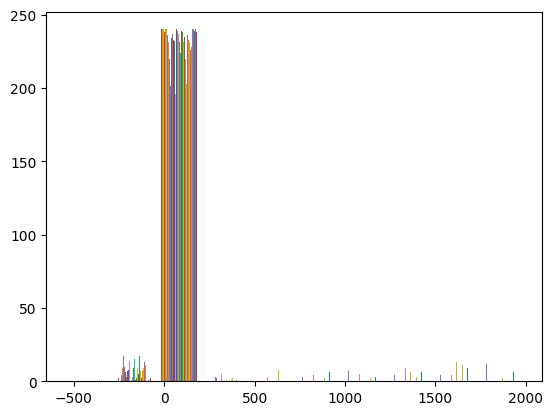

In [49]:
for u in range(U):
    for v in range(V):
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] * quantization

plt.hist((Y_quant))

In [55]:
img_rec = np.zeros(img.shape)
for u in range(U):
    for v in range(V):
        img_rec[u*8 : u*8 + 8, v*8 : v*8 + 8] = idct(idct(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8], axis=0, norm='ortho'), axis=1, norm='ortho')


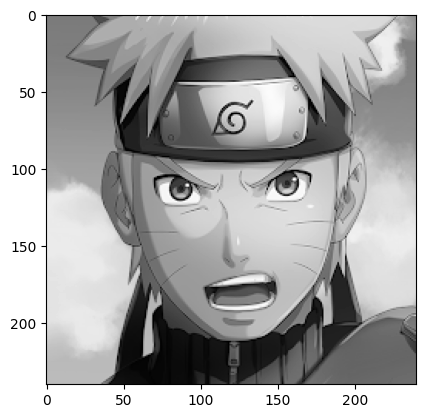

In [57]:
plt.imshow((img_rec + 128), cmap='gray')
# plt.hist((img_rec))

Em blocos

In [52]:
Y_blck = np.zeros((64, 64))

for u in range(8):
    for v in range(8):
        Y_blck[u*8 : u*8 + 8, v*8 : v*8 + 8] = dct(dct(img[u*8 : u*8 + 8, v*8 : v*8 + 8], axis=0), axis=1)

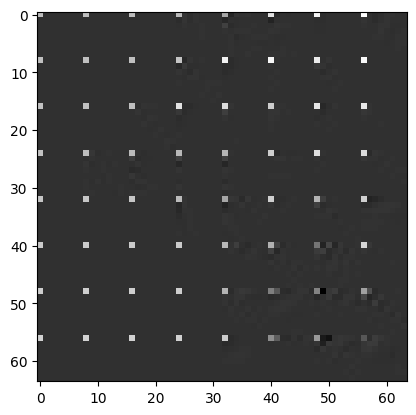

In [53]:
plt.imshow(Y_blck, cmap='gray')

In [54]:
u = 1
v = 6
print(Y_blck[u*8: u*8 + 8, v*8: v*8+8])



[[ 4.15040000e+04 -8.74869071e+01  8.18855626e+02 -1.81519923e+02
   5.65685425e+00  7.63954154e+01  4.04408588e+01 -2.92625890e+01]
 [ 1.74590259e+03  5.55603798e+02 -6.76887126e+02 -2.81209382e+01
   1.19050839e+02 -1.26620182e+02 -1.26574137e+01  2.24479523e+01]
 [-2.24357412e+02 -9.10575773e+02  1.00710678e+02  4.02003129e+02
  -2.35335180e+02  1.10985889e+02  3.78822510e+01 -5.04621809e+01]
 [-7.54874591e+01  3.47837093e+02  5.08439967e+02 -3.59678091e+02
   3.53238708e+01  6.67236810e+01 -1.38959762e+02  1.01043491e+02]
 [-5.65685425e+01  1.09509763e+02 -3.85493201e+02 -1.12345018e+02
   1.80000000e+02 -1.32041062e+02  1.25039962e+02 -7.26592492e+01]
 [-1.03758007e+02 -3.14698974e+01 -4.65556507e+01  2.57150088e+02
  -9.00550917e+00 -6.72811293e+00  8.87408355e+00 -2.05304389e+01]
 [ 1.23546557e+02  1.86248531e+01  9.78822510e+01 -1.56970790e-01
  -1.70954242e+02  1.14270359e+00 -4.07106781e+01  7.00908817e+01]
 [ 2.81053637e-01 -8.31256408e+01 -1.80391078e+00 -8.90122855e+01
   